## Dataset Context

The dataset used in this project is the **TMDB Movie Metadata** dataset from Kaggle. It contains movie-level information originally sourced from *The Movie Database (TMDb)*, a community-driven platform where users contribute and maintain data about films, TV shows, cast, and crew.

The dataset was collected by compiling publicly available metadata from TMDb's API and organizing it into structured CSV files (movies and credits). It includes information such as movie titles, genres, budgets, revenues, descriptions, popularity metrics, cast lists, and crew details.

In [1]:
import pandas as pd 
import numpy as np 

df_credits=pd.read_csv('dataset/tmdb_5000_credits.csv')
df=pd.read_csv('dataset/tmdb_5000_movies.csv')

In [3]:
max_val = df["vote_average"].max()
min_val = df["vote_average"].min()

print("Max vote_average:", max_val)
print("Min vote_average:", min_val)


Max vote_average: 10.0
Min vote_average: 0.0


In [2]:
df_credits.columns = ['id','title','cast','crew']
df= df.merge(df_credits,on='id')
df['title'] = df['title_x']
df = df.drop(columns=['title_x', 'title_y'])
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter


In [3]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'title'],
      dtype='object')

In [4]:
print("df is unique: ", df['id'].is_unique)
print("df has", len(df), "rows, with", df['id'].nunique(), "unique IDs")
print("df has", df['id'].duplicated().sum(), "duplicate IDs")
    
if df['id'].duplicated().any():
    print("\ndf duplicate IDs:")
    print(df[df['id'].duplicated(keep=False)].sort_values('id'))


df is unique:  True
df has 4803 rows, with 4803 unique IDs
df has 0 duplicate IDs


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from collections import Counter

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
print("=== Data Overview (Before Cleaning) ===")
print(f"Shape: {df.shape}")
print(f"\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False))
print(f"\nTarget variable (vote_average) statistics:")
print(df['vote_average'].describe())


=== Data Overview (Before Cleaning) ===
Shape: (4803, 22)

Missing values:
homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
revenue                    0
crew                       0
cast                       0
vote_count                 0
vote_average               0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
title                      0
dtype: int64

Target variable (vote_average) statistics:
count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


In [7]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'title'],
      dtype='object')

In [8]:
print("=== Data Cleaning ===")
print(f"Original shape: {df.shape}")

df = df.drop(columns=['homepage', 'tagline'])
print(f"After dropping homepage and tagline: {df.shape}")

df = df.dropna(subset=['overview'])
print(f"After dropping rows with missing overview: {df.shape}")

runtime_mean = df['runtime'].mean()
df['runtime'] = df['runtime'].fillna(runtime_mean)
print(f"Filled {df['runtime'].isnull().sum()} missing runtime values with mean: {runtime_mean:.2f}")

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
release_date_median = df['release_date'].median()
df['release_date'] = df['release_date'].fillna(release_date_median)
print(f"Filled {df['release_date'].isnull().sum()} missing release_date values with median: {release_date_median}")

print(f"\nFinal shape: {df.shape}")
print(f"\nRemaining missing values:")
remaining_missing = df.isnull().sum()
print(remaining_missing[remaining_missing > 0])


=== Data Cleaning ===
Original shape: (4803, 22)
After dropping homepage and tagline: (4803, 20)
After dropping rows with missing overview: (4800, 20)
Filled 0 missing runtime values with mean: 106.88
Filled 0 missing release_date values with median: 2005-09-30 00:00:00

Final shape: (4800, 20)

Remaining missing values:
Series([], dtype: int64)


In [9]:
def safe_parse_json(x):
    if pd.isna(x) or x == '':
        return []
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x

df['num_genres'] = df['genres'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

df['num_keywords'] = df['keywords'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

df['num_production_companies'] = df['production_companies'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

df['num_production_countries'] = df['production_countries'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

df['num_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

df['num_cast'] = df['cast'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

df['num_crew'] = df['crew'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

def get_director(crew_list):
    if not crew_list:
        return []
    directors = []
    for person in crew_list:
        if person.get('job') == 'Director':
            directors.append(person.get('name'))
    return directors

df['director'] = df['crew'].apply(lambda x: get_director(safe_parse_json(x)))

def get_top_cast(cast_list, n=3):
    if not cast_list:
        return []
    return [actor.get('name', '') for actor in cast_list[:n]]

df['top_cast'] = df['cast'].apply(lambda x: get_top_cast(safe_parse_json(x)))

print("New features created!")
print(f"Total features: {df.shape[1]}")


New features created!
Total features: 29


=== Average vote_average by Genre ===
genre
History            6.719797
War                6.713889
Drama              6.388197
Music              6.355676
Foreign            6.352941
Animation          6.341453
Documentary        6.285185
Crime              6.274138
Romance            6.207718
Mystery            6.183908
Western            6.178049
Adventure          6.156962
Fantasy            6.096698
Family             6.029630
Thriller           6.010989
Science Fiction    6.005607
Action             5.989515
Comedy             5.945587
TV Movie           5.662500
Horror             5.626590
Name: vote_average, dtype: float64


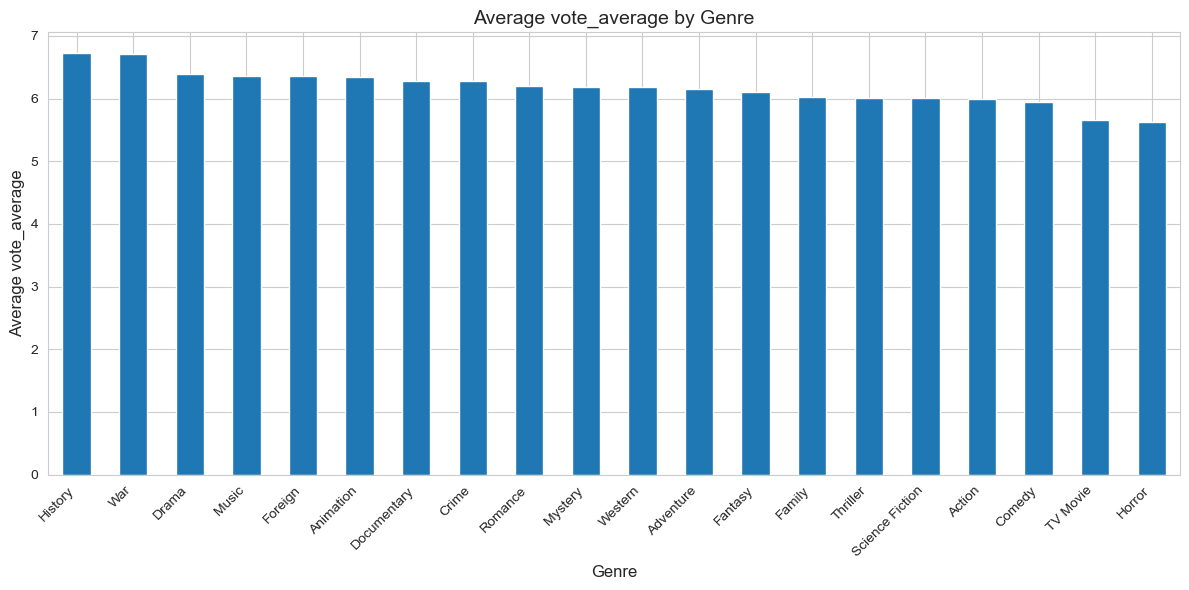

In [13]:
def extract_genres(genres_str):
    genres_list = safe_parse_json(genres_str)
    return [g.get('name', '') for g in genres_list if isinstance(g, dict)]

df['genre_list'] = df['genres'].apply(extract_genres)

all_genres = []
genre_votes = []

for idx, row in df.iterrows():
    genres = row['genre_list']
    vote = row['vote_average']
    for genre in genres:
        all_genres.append(genre)
        genre_votes.append((genre, vote))

genre_df = pd.DataFrame(genre_votes, columns=['genre', 'vote_average'])
genre_avg = genre_df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

print("=== Average vote_average by Genre ===")
print(genre_avg)

plt.figure(figsize=(12, 6))
genre_avg.plot(kind='bar')
plt.title('Average vote_average by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average vote_average', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

=== Average vote_average by Original Language (min 10 movies) ===
   language  avg_vote  movie_count
17       ja  7.050000           16
16       it  7.007692           13
18       ko  6.672727           11
8        es  6.659375           32
2        cn  6.500000           12
10       fr  6.430000           70
27       ru  6.354545           11
36       zh  6.300000           27
5        de  6.284615           26
7        en  6.067029         4504
12       hi  6.010526           19


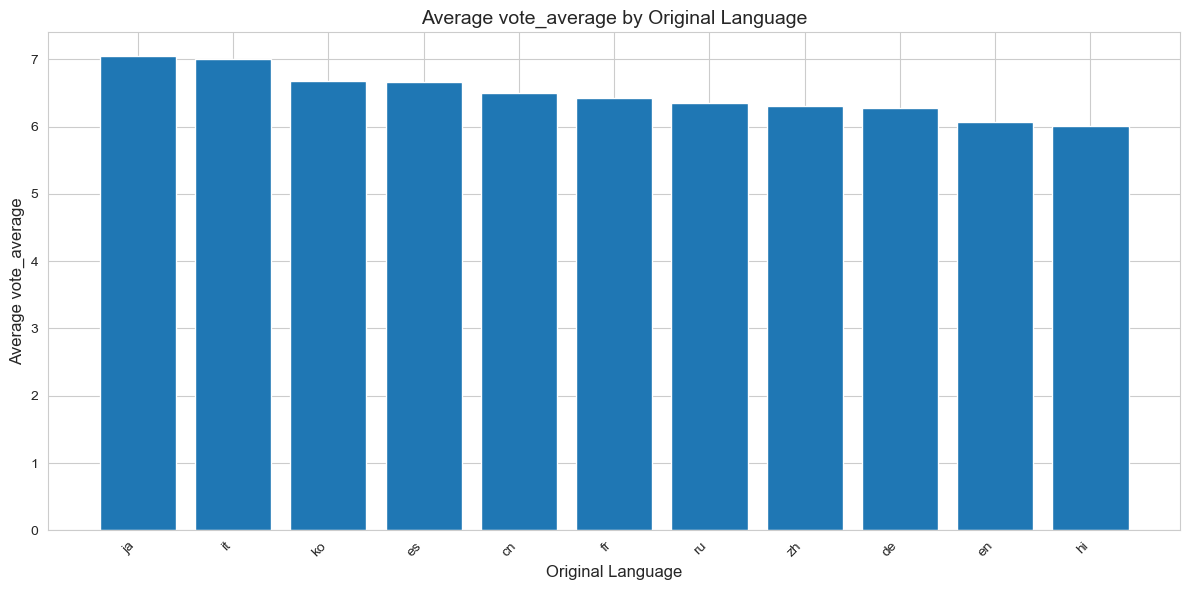

In [14]:
language_stats = df.groupby('original_language').agg({
    'vote_average': ['mean', 'count']
}).reset_index()
language_stats.columns = ['language', 'avg_vote', 'movie_count']
language_stats = language_stats[language_stats['movie_count'] >= 10]  # Languages with at least 10 movies
language_stats = language_stats.sort_values('avg_vote', ascending=False)

print("=== Average vote_average by Original Language (min 10 movies) ===")
print(language_stats)

plt.figure(figsize=(12, 6))
plt.bar(range(len(language_stats)), language_stats['avg_vote'])
plt.xticks(range(len(language_stats)), language_stats['language'], rotation=45, ha='right')
plt.xlabel('Original Language', fontsize=12)
plt.ylabel('Average vote_average', fontsize=12)
plt.title('Average vote_average by Original Language', fontsize=14)
plt.tight_layout()
plt.show()


# Pearson Correlation

=== Pearson Correlation with vote_average (sorted) ===
vote_average                1.000000
runtime                     0.375378
num_keywords                0.289158
popularity                  0.274366
num_cast                    0.230449
revenue                     0.197431
num_crew                    0.170978
num_production_companies    0.153951
num_spoken_languages        0.137813
num_production_countries    0.126074
budget                      0.092902
num_genres                  0.085024
Name: vote_average, dtype: float64


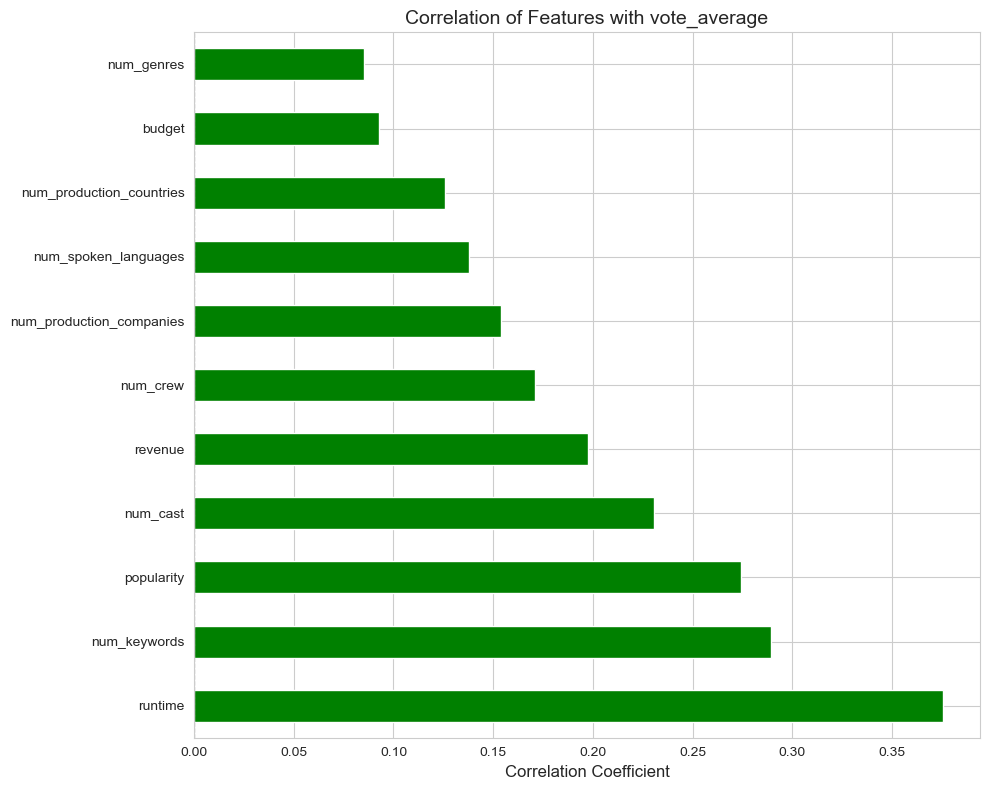

In [15]:
numerical_features = ['budget', 'popularity', 'revenue', 'runtime', 
                      'num_genres', 'num_keywords', 'num_production_companies',
                      'num_production_countries', 'num_spoken_languages',
                      'num_cast', 'num_crew', 'vote_average']

corr_df = df[numerical_features].corr() # pearson correlation

vote_corr = corr_df['vote_average'].sort_values(ascending=False)
print("=== Pearson Correlation with vote_average (sorted) ===")
print(vote_corr)

plt.figure(figsize=(10, 8))
vote_corr_without_self = vote_corr.drop('vote_average')
colors = ['red' if x < 0 else 'green' for x in vote_corr_without_self.values]
vote_corr_without_self.plot(kind='barh', color=colors)
plt.title('Correlation of Features with vote_average', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Spearman Correlation

=== Spearman Correlation with vote_average (sorted) ===
vote_average                1.000000
runtime                     0.398553
popularity                  0.360048
num_keywords                0.327981
num_cast                    0.251736
revenue                     0.244019
num_crew                    0.218832
num_spoken_languages        0.121770
num_production_companies    0.112234
num_production_countries    0.099928
budget                      0.066114
num_genres                  0.023319
Name: vote_average, dtype: float64


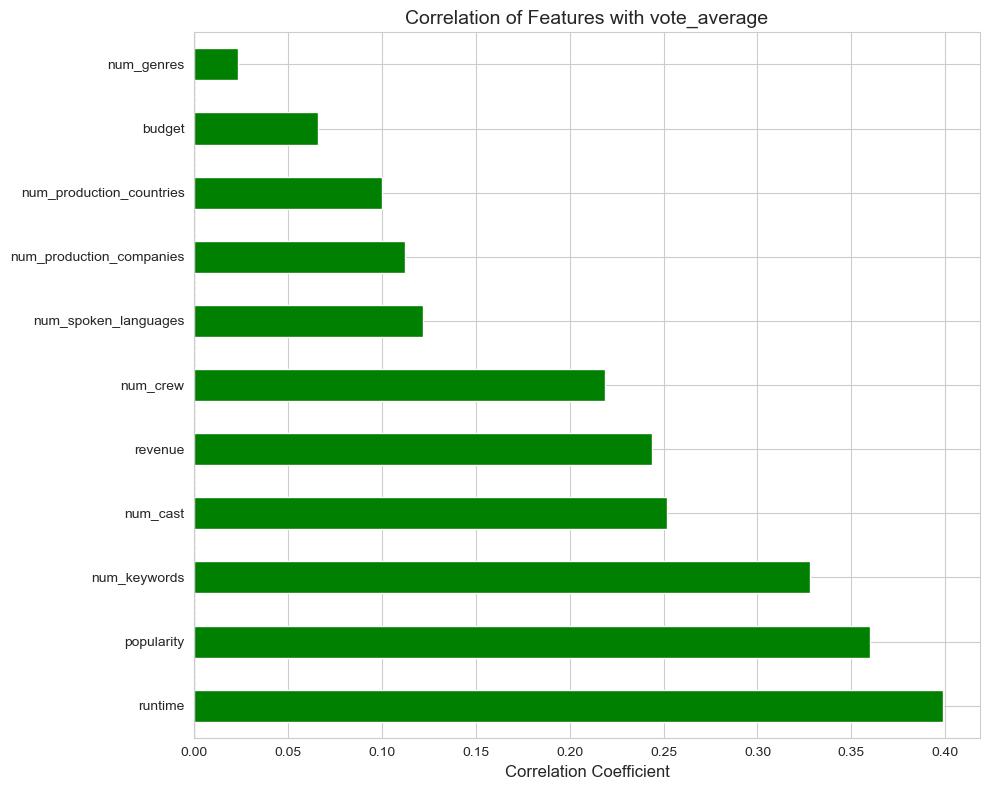

In [16]:
numerical_features = ['budget', 'popularity', 'revenue', 'runtime', 
                      'num_genres', 'num_keywords', 'num_production_companies',
                      'num_production_countries', 'num_spoken_languages',
                      'num_cast', 'num_crew', 'vote_average']

corr_df = df[numerical_features].corr(method='spearman') # pearson correlation

vote_corr = corr_df['vote_average'].sort_values(ascending=False)
print("=== Spearman Correlation with vote_average (sorted) ===")
print(vote_corr)

plt.figure(figsize=(10, 8))
vote_corr_without_self = vote_corr.drop('vote_average')
colors = ['red' if x < 0 else 'green' for x in vote_corr_without_self.values]
vote_corr_without_self.plot(kind='barh', color=colors)
plt.title('Correlation of Features with vote_average', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'title', 'num_genres', 'num_keywords',
       'num_production_companies', 'num_production_countries',
       'num_spoken_languages', 'num_cast', 'num_crew', 'director', 'top_cast',
       'genre_list'],
      dtype='object')

In [18]:
# show first data
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,num_genres,num_keywords,num_production_companies,num_production_countries,num_spoken_languages,num_cast,num_crew,director,top_cast,genre_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,4,21,4,2,2,83,153,[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,3,16,3,1,1,34,32,[Gore Verbinski],"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,3,7,3,2,5,83,155,[Sam Mendes],"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,4,21,4,1,1,158,217,[Christopher Nolan],"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,3,16,1,1,1,27,132,[Andrew Stanton],"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]"


In [ ]:
def extract_name_list(obj, key="name"):
    if not obj:
        return []
    return [d.get(key, "") for d in obj if isinstance(d, dict) and d.get(key)]

def row_to_text(row):
    title = row.get("title", "")

    kw_list = extract_name_list(safe_parse_json(row["keywords"]))
    keywords_text = ", ".join(kw_list) if kw_list else "None"
   
    prod_companies_list = extract_name_list(safe_parse_json(row["production_companies"]))
    prod_companies_text = ", ".join(prod_companies_list) if prod_companies_list else "None"

    prod_countries_list = extract_name_list(safe_parse_json(row["production_countries"]))
    prod_countries_text = ", ".join(prod_countries_list) if prod_countries_list else "None"

    cast_list = extract_name_list(safe_parse_json(row["cast"]))
    cast_text = ", ".join(cast_list[:10]) if cast_list else "None"

    directors = row.get("director", []) or []
    if isinstance(directors, str):
        directors = [directors]
    director_text = ", ".join(directors) if directors else "None"

    genres = row.get("genre_list", []) or []
    genres_text = ", ".join(genres) if genres else "None"

    return (
        f"Title: {title}\n"
        f"Budget: {row['budget']}, revenue: {row['revenue']}, "
        f"runtime: {row['runtime']} minutes, popularity: {row['popularity']}.\n"
        f"Keywords: {keywords_text}.\n"
        f"Original language: {row['original_language']}.\n"
        f"Status: {row['status']}.\n"
        f"Genres: {genres_text}.\n"
        f"Cast: {cast_text}.\n"
        f"Director: {director_text}.\n"
        f"Production companies: {prod_companies_text}.\n"
        f"Production countries: {prod_countries_text}.\n"
        f"Number of cast: {row['num_cast']}, "
        f"number of crew: {row['num_crew']}, "
        f"Overview: {row['overview']}\n"
    )

df["lm_input"] = df.apply(row_to_text, axis=1)

In [25]:
max([len(x) for x in df["lm_input"]])

4216

In [ ]:
from transformers import AutoTokenizer

deberta_model_name = "microsoft/deberta-v3-base"

tokenizer = AutoTokenizer.from_pretrained(deberta_model_name)

texts = df["lm_input"].astype(str).tolist()
encodings = tokenizer(texts, padding=False, truncation=False)

lm_lengths = [len(ids) for ids in encodings["input_ids"]]

df["lm_input_length"] = lm_lengths

print("=== DeBERTa token length stats for lm_input ===")
print("Max length:", max(lm_lengths))
print("Min length:", min(lm_lengths))
print("Mean length:", sum(lm_lengths) / len(lm_lengths))

over_512 = sum(l > 512 for l in lm_lengths)
print(f"Number of samples > 512 tokens: {over_512} / {len(lm_lengths)}")


ImportError: dlopen(/Users/kelton/opt/anaconda3/envs/256HW/lib/python3.12/site-packages/torch/_C.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libgfortran.5.dylib
  Referenced from: <0B9C315B-A1DD-3527-88DB-4B90531D343F> /Users/kelton/opt/anaconda3/envs/256HW/lib/libopenblas.0.dylib
  Reason: tried: '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/python3.12/site-packages/torch/lib/libgfortran.5.dylib' (no such file), '/Users/kelton/opt/anaconda3/envs/256HW/lib/python3.12/site-packages/torch/../../../libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/lib/python3.12/site-packages/torch/lib/libgfortran.5.dylib' (no such file), '/Users/kelton/opt/anaconda3/envs/256HW/lib/python3.12/site-packages/torch/../../../libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/bin/../lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/Users/kelton/opt/anaconda3/envs/256HW/bin/../lib/libgfortran.5.dylib' (duplicate LC_RPATH '@loader_path'), '/usr/local/lib/libgfortran.5.dylib' (no such file), '/usr/lib/libgfortran.5.dylib' (no such file, not in dyld cache)